In [2]:
import shutil
import os
import pandas as pd

data = '/home/dennis/projects/evaluation-pipeline/data/datasets/visda2017_meshes/train'
out = '/home/dennis/projects/evaluation-pipeline/data/datasets/visda2017_meshgrid'

d = {}
for path, dns, fns in os.walk(data):
    for fn in fns:
        fnsplit = fn.split('__')
        mesh = fnsplit[0]
        angles = fnsplit[1].split('_')
        light_angle = angles[1]
        if f"{mesh}_{light_angle}" in d.keys():
            d[f"{mesh}_{light_angle}"].append(fn)
        else:
            d[f"{mesh}_{light_angle}"] = [fn]

In [ ]:
import torchvision
import random
from torchvision.utils import make_grid
from torchvision.io import read_image
from torchvision import transforms as transforms
import os

#TODO: Parse visda2017/train and use dictionary to make grids

img_dir = "data/visda2017/train/car"

grid_size = (7,7)
padding = 0
n_img = grid_size[0] * grid_size[1]
renders = os.listdir(img_dir)
rnd_model = random.sample(renders, k=1)[0]
rnd_model = rnd_model.split('_')[3]
renders = [render for render in renders if render.split('_')[3] == rnd_model]
rnd_imgs = random.sample(renders, k=n_img)
imgs = [read_image(f'{img_dir}/{img_fn}') for img_fn in rnd_imgs]
grid = make_grid(imgs, nrow=grid_size[1], padding=padding)
img_grid = torchvision.transforms.ToPILImage()(grid)
img_grid = img_grid.resize((224, 224))

    

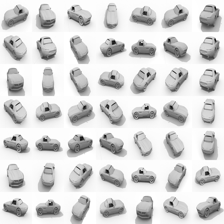

In [22]:
import torchvision
import random
from torchvision.utils import make_grid
from torchvision.io import read_image
from torchvision import transforms as transforms
import os

img_dir = "data/visda2017/train/car"

grid_size = (7,7)
padding = 0
n_img = grid_size[0] * grid_size[1]
renders = os.listdir(img_dir)
rnd_model = random.sample(renders, k=1)[0]
rnd_model = rnd_model.split('_')[3]
renders = [render for render in renders if render.split('_')[3] == rnd_model]
rnd_imgs = random.sample(renders, k=n_img)
imgs = [read_image(f'{img_dir}/{img_fn}') for img_fn in rnd_imgs]
grid = make_grid(imgs, nrow=grid_size[1], padding=padding)
img_grid = torchvision.transforms.ToPILImage()(grid)
img_grid = img_grid.resize((224, 224))
img_grid

    

In [ ]:
import torch

def collate_fn(examples):
    """Data Collator for Huggingface image classification Dataset

    Args:
        examples (dict): A batch of data samples

    Returns:
        dict: prepared batch of data samples. Stacked pixel values and tensor of labels
    """
    pixel_values = torch.stack([example["pixel_values"] for example in examples])
    labels = torch.tensor([example["label"] for example in examples])
    return {"pixel_values": pixel_values, "labels": labels}